<h1>Quick tutorial</h1>

In this quick tutorial we show how to build a simple model with two point sources, how to save it for later use, and re-load it back. We will also plot the spectra of the two point sources, with their components

First let's import the modules we need.

In [1]:
from astromodels import *

# We also import astropy units to show the unit-conversion
# feature
import astropy.units as u

/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/functions/function.py:336: WarningNoTests: The function class synchrotron contains no tests.
  warnings.warn("The function class %s contains no tests." % name, WarningNoTests)
/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/functions/function.py:336: WarningNoTests: The function class line contains no tests.
  warnings.warn("The function class %s contains no tests." % name, WarningNoTests)


Function powerlaw: 
 variables: x
 parameters: logK,piv,index

Function gaussian: 
 variables: x
 parameters: logK,mu,sigma

Function uniform_prior: 
 variables: x
 parameters: lower_bound,upper_bound,value

Function log_uniform_prior: 
 variables: x
 parameters: lower_bound,upper_bound

Function sin: 
 variables: x
 parameters: logK,f,phi

Function synchrotron: 
 variables: x
 parameters: B,emin,emax,need

Function line: 
 variables: x
 parameters: logK,a,b

Function band: 
 variables: x
 parameters: alpha,beta,log_Ep,log_Flux,Emin,Emax,opt



/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/functions/function.py:336: WarningNoTests: The function class band contains no tests.
  warnings.warn("The function class %s contains no tests." % name, WarningNoTests)


Now let's define the first point source. In astromodels a point source is characterized by a position (which can be given in Equatorial or Galactic coordiantes) and one or more `components`. For example, a source featuring both a synchrotron and a Inverse Compton emission would have two components. 

Let's start from a point source located at (R.A., Dec) = (125.6, -75.3) deg (ICRS, J2000), and having just one component with a power law spectrum.

The spectrum can be defined as follows:

In [2]:
# Let's start by defining the spectrum

pts1_shape = powerlaw()

# Have a look at it

pts1_shape.display()

* description: A simple power-law with normalization expressed as a logarithm
  * formula: $ \frac{dN}{dx} = 10^{logK}~\frac{x}{piv}^{index} $
  * parameters: 
    * logK: 
      * value: 0.0
      * min_value: -40
      * max_value: 40
      * unit: dex(1 / (cm2 keV s))
      * delta: 0.1
      * free: True
    * piv: 
      * value: 1.0
      * min_value: None
      * max_value: None
      * unit: keV
      * delta: 0.1
      * free: False
    * index: 
      * value: -2.0
      * min_value: -10
      * max_value: 10
      * unit: 
      * delta: 0.2
      * free: True

We can change the value of the parameters as:

In [3]:
pts1_shape.logK = 1.2
pts1_shape.index = -2.1

We can also provide the parameters in different units, and astromodels will convert automatically to the one used internally and reported above: 

In [4]:
# Express the differential flux at the pivot energy in 1 / (MeV cm2 s)

pts1_shape.logK.set(122.3 / (u.MeV * u.cm * u.cm * u.s))

# Verify how things have changed

pts1_shape.display()

/home/giacomov/software/canopy-env/lib/python2.7/site-packages/astromodels-0.1-py2.7.egg/astromodels/parameter.py:371: WarningUnitsAreSlow: Using units is convenient but slow. Do not use them during computing-intensive work.
  WarningUnitsAreSlow)


* description: A simple power-law with normalization expressed as a logarithm
  * formula: $ \frac{dN}{dx} = 10^{logK}~\frac{x}{piv}^{index} $
  * parameters: 
    * logK: 
      * value: -0.912573542964
      * min_value: -40
      * max_value: 40
      * unit: dex(1 / (cm2 keV s))
      * delta: 0.1
      * free: True
    * piv: 
      * value: 1.0
      * min_value: None
      * max_value: None
      * unit: keV
      * delta: 0.1
      * free: False
    * index: 
      * value: -2.1
      * min_value: -10
      * max_value: 10
      * unit: 
      * delta: 0.2
      * free: True

The warning you see the first time you execute this command warns you that using conversions like these is slow, so it is fine in an interactive environment but you need to be careful if you are using this feature in a computing-intensive situation (like during fitting).

Now let's define the point source:

In [5]:
pts1 = PointSource('source_1', ra=125.6, dec=-75.3, 
                   spectral_shape=pts1_shape)

# Get some info about what we just created
pts1.display()

* source_1 (point source): 
    * position: 
      * ra: 125.6
      * dec: -75.3
      * equinox: J2000
    * components: 
      * main: 
        * powerlaw: 
          * logK: -0.912573542964
          * piv: 1.0
          * index: -2.1

Now let's define another source, this time at Galactic Coordinates l = 11.25, b = -22.5, and with two spectral components:

In [6]:
# Another point source with two spectral components,

# Define component 1, also showing another way to
# instance the spectrum, which allows to specify
# directly the parameters' values

spectrum1 = powerlaw(logK=0.2, index=-0.75)
component1 = SpectralComponent('synchrotron',spectrum1)

spectrum2 = powerlaw(logK=-1, index=-1.7)
component2 = SpectralComponent('Inverse_Compton',spectrum2)

point_source2 = PointSource('source_2', l=11.25, b=-22.5, components=[component1,component2])

# Have a look at what we just created

point_source2.display()

* source_2 (point source): 
    * position: 
      * l: 11.25
      * b: -22.5
      * equinox: J2000
    * components: 
      * synchrotron: 
        * powerlaw: 
          * logK: 0.2
          * piv: 1.0
          * index: -0.75
      * Inverse_Compton: 
        * powerlaw: 
          * logK: -1
          * piv: 1.0
          * index: -1.7

Now let's build the final model, which comprises our two sources:

In [7]:
# Build a model with the two point sources

my_model = Model(pts1, point_source2)

In [8]:
# Let's have a look at what we just created

my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-0.912573542964,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-2.1,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,0.2,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.Inverse_Compton.powerlaw.logK,-1.0,-40,40,0.1,True
source_2.spectrum.Inverse_Compton.powerlaw.index,-1.7,-10,10,0.2,True


Now let's have a look at different ways to change parameters values or characteristics:

In [9]:
# Method 1: universal method. When you have available an instance of a model
# you can refer to a parameter with the 'extended' syntax:

my_model.source_2.spectrum.synchrotron.powerlaw.logK = 0.3

# Method 2: universal method 2. You can obtain the same result without
# explicitly using the name of the spectral function, by using the
# generic name 'shape':

my_model.source_2.spectrum.synchrotron.shape.logK = 0.3

# Method 3: using instances created previously.

point_source2.spectrum.synchrotron.shape.logK = -0.3
component2.shape.logK = -0.3
spectrum2.logK = -0.3

my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-0.912573542964,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-2.1,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,-0.3,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.Inverse_Compton.powerlaw.logK,-0.3,-40,40,0.1,True
source_2.spectrum.Inverse_Compton.powerlaw.index,-1.7,-10,10,0.2,True


Now we can save the model for later use:

In [10]:
# Save the model to a file

my_model.save('my_model.yml', overwrite=True)

The content of the file is YAML code, which is human-readable and very easy to understand. Let's have a look:

In [11]:
with open('my_model.yml') as yaml_file:
    
    print("".join(yaml_file.readlines()))

source_1 (point source):

  position:

    ra: {value: 125.6, min_value: 0.0, max_value: 360.0, unit: '', delta: 12.56, free: false}

    dec: {value: -75.3, min_value: -90.0, max_value: 90.0, unit: '', delta: 7.53,

      free: false}

    equinox: J2000

  spectrum:

    main:

      powerlaw:

        logK: {value: -0.9125735429637145, min_value: -40, max_value: 40, unit: dex(1

            / (cm2 keV s)), delta: 0.1, free: true}

        piv: {value: 1.0, min_value: null, max_value: null, unit: keV, delta: 0.1,

          free: false}

        index: {value: -2.1, min_value: -10, max_value: 10, unit: '', delta: 0.2,

          free: true}

      polarization: {}

source_2 (point source):

  position:

    l: {value: 11.25, min_value: 0.0, max_value: 360.0, unit: '', delta: 1.125, free: false}

    b: {value: -22.5, min_value: -90.0, max_value: 90.0, unit: '', delta: 2.25, free: false}

    equinox: J2000

  spectrum:

    synchrotron:

      powerlaw:

        logK: {value: -0.3, m

Now suppose that you want to load back a file you created in a previous session. You can do it with:

In [12]:
# Re-load the model from the file, just to show how it is done

my_model_2 = load_model('my_model.yml')

In [13]:
# Explore the model we just loaded back

my_model_2.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-0.912573542964,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,-2.1,-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.logK,-0.3,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,-0.75,-10,10,0.2,True
source_2.spectrum.Inverse_Compton.powerlaw.logK,-0.3,-40,40,0.1,True
source_2.spectrum.Inverse_Compton.powerlaw.index,-1.7,-10,10,0.2,True


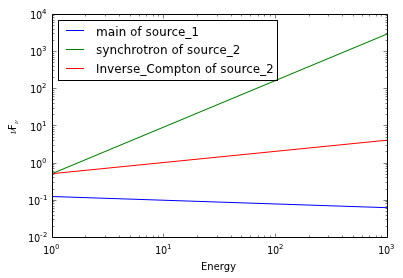

In [14]:
# Now evaluate and plot our models. You need matplotlib for this

import matplotlib.pyplot as plt

%matplotlib inline

# Energies where we want to evaluate the model

e = np.logspace(0,3,100)

# Loop over the sources

for src_name, src in my_model.point_sources.iteritems():
    
    # Loop over the components of each source
    
    for comp_name, component in src.components.iteritems():
        
        # Get the differential flux (in ph/cm2/s)
        
        flux = component.shape(e)
        
        # this can also be accomplished with:
        # flux = component.powerlaw(e)
        # but this requires to know the name of the
        # spectral shape which was used
        
        # Plot this component for this source
        
        plt.plot(e,e * e * flux,label="%s of %s" % (component.name, src.name))

plt.legend(loc=0)
plt.loglog()
plt.xlabel("Energy")
plt.ylabel(r"$\nu$F$_{\nu}$")

In [15]:
# Add the time as an independent variable of the model

time = IndependentVariable("time",1.0, unit='s')

my_model.add_independent_variable(time)

# Make the index of the second source vary linearly with time

law = line(a=-0.002,b=-2.0)

p1 = my_model.source_2.spectrum.synchrotron.powerlaw.index
p1.add_auxiliary_variable(time, law)

# Link the index of the spectrum of source_1 to be 2.2 units
# more than the spectrum of the synchrotron component
# in source_2

p2 = my_model.source_1.spectrum.main.powerlaw.index
p2.add_auxiliary_variable( p1, line(a=1,b=+2.2) )

p3 = my_model['source_2.spectrum.Inverse_Compton.powerlaw.logK']
p3.add_auxiliary_variable(time, gaussian(mu=50,sigma=20))

In [16]:
my_model.display()

name,value,min_value,max_value,delta,free
source_1.spectrum.main.powerlaw.logK,-0.912573542964,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index,f(source_2.spectrum.synchrotron.powerlaw.index),-10,10,0.2,True
source_1.spectrum.main.powerlaw.index.line.logK,0.0,-40,40,0.1,True
source_1.spectrum.main.powerlaw.index.line.a,1,None,None,0.1,True
source_1.spectrum.main.powerlaw.index.line.b,2.2,None,None,0.1,True
source_2.spectrum.synchrotron.powerlaw.logK,-0.3,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index,f(time),-10,10,0.2,True
source_2.spectrum.synchrotron.powerlaw.index.line.logK,0.0,-40,40,0.1,True
source_2.spectrum.synchrotron.powerlaw.index.line.a,-0.002,None,None,0.1,True
source_2.spectrum.synchrotron.powerlaw.index.line.b,-2.0,None,None,0.1,True


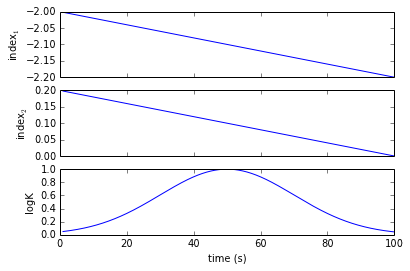

In [17]:
logK = my_model['source_2.spectrum.synchrotron.powerlaw.index']

times = np.linspace(1,100,1000)

fig, subs = plt.subplots(3,1, sharex=True)


for sub, par, label in zip(subs,[p1,p2,p3],[r'index${_1}$',r'index$_{2}$','logK']):
    
    lc = []
    
    for t in times:
    
        time.value = t
    
        lc.append(par.value)

    sub.plot(times, lc)    
    sub.set_ylabel(label)

subs[-1].set_xlabel('%s (%s)' % (time.name,time.unit))
    
#plt.loglog()

In [18]:
print(time)

IndependentVariable time = 100.0
(min_value = None, max_value = None)


In [19]:
my_model.save("test_links.yml", overwrite=True)

In [2]:
my_model2 = load_model('test_links.yml')

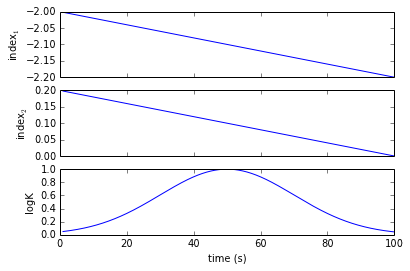

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline


p1 = my_model2.source_2.spectrum.synchrotron.powerlaw.index

p2 = my_model2.source_1.spectrum.main.powerlaw.index

p3 = my_model2['source_2.spectrum.Inverse_Compton.powerlaw.logK']

times = np.linspace(1,100,1000)

fig, subs = plt.subplots(3,1, sharex=True)

for sub, par, label in zip(subs,[p1,p2,p3],[r'index${_1}$',r'index$_{2}$','logK']):
    
    lc = []
    
    for t in times:
    
        my_model2['time'].value = t
    
        lc.append(par.value)

    sub.plot(times, lc)    
    sub.set_ylabel(label)

subs[-1].set_xlabel('%s (%s)' % (my_model2['time'].name,my_model2['time'].unit))


In [ ]:
particle_distribution = powerlaw()

particle = PointSource('electrons',ra=0.0,dec=0.0,spectral_shape=particle_distribution)

synch_spectrum = synchrotron()

synch_spectrum.set_particle_distribution(particle_distribution)

synch_source = PointSource('synch_source',ra=12.6, dec=-13.5, spectral_shape=synch_spectrum)

In [ ]:
my_model = Model(particle, synch_source)

my_model.display()

In [ ]:
magnetic_field = my_model['synch_source.spectrum.main.synchrotron.B']

magnetic_field_decay = powerlaw()

magnetic_field.add_auxiliary_variable(time, magnetic_field_decay)

index = my_model['electrons.spectrum.main.powerlaw.index']

index.add_auxiliary_variable(time, line(logK=0, a=1e-3,b=-1.5))

my_model.display()

In [ ]:
times = np.linspace(1,100,1000)

p1 = my_model['electrons.spectrum.main.powerlaw.index']
p2 = my_model['synch_source.spectrum.main.synchrotron.B']

fig, subs = plt.subplots(2,1, sharex=True)

for sub, par, label in zip(subs,[p1,p2],[r'index${_e}$',r'B']):
    
    lc = []
    
    for t in times:
    
        time.value = t
    
        lc.append(par.value)

    sub.plot(times, lc)    
    sub.set_ylabel(label)

subs[-1].set_xlabel('time (s)')

subs[-1].set_yscale("log")